In [21]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import torch
import sys
sys.path.append("..")
from graph.grid import get_square_grid
from graph.utils import get_edge_list
from neural_rk.grid_graph_dirichlet import *

Nx = 4
Ny = 3

dx = np.array([0.1, 0.2, 0.3])
dy = np.array([0.4, 0.5])

x = np.insert(np.cumsum(dx), 0, 0.0)
y = np.insert(np.cumsum(dy), 0, 0.0)
xy = np.stack(np.meshgrid(x, y), axis=-1)
is_not_boundary = np.ones((Ny, Nx))
is_not_boundary[(0, -1), :] = 0.0
is_not_boundary[:, (0, -1)] = 0.0


z1 = xy[..., 0] * xy[..., 1]
z1 /= z1.max()
z2 = xy[..., 0] + xy[..., 1] + 0.1
z2 /= z2.max()
z = np.stack((z1, z2), axis=-1)

z *= is_not_boundary[..., None]

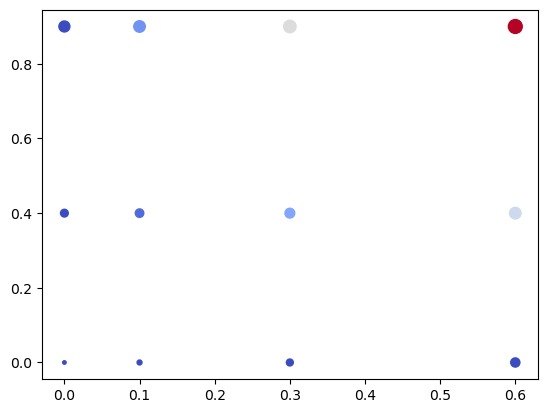

In [15]:
fig, ax = plt.subplots()

ax.scatter(
    xy[..., 0].reshape(-1),
    xy[..., 1].reshape(-1),
    s=100.0 * z[..., 1].reshape(-1),
    c=z[..., 0].reshape(-1),
    cmap="coolwarm",
    vmin=0.0,
    vmax=1.0,
)
fig.show()

In [5]:
graph = get_square_grid(Nx, Ny, periodic=False)
edge_list = get_edge_list(graph)
edge_attr = dxdy2edge(dx, dy)

for i, (edge, attr) in enumerate(zip(edge_list, edge_attr)):
    print(i, edge, attr)

0 [0 1] [0.1 0. ]
1 [0 4] [0.  0.4]
2 [1 2] [0.2 0. ]
3 [1 5] [0.  0.4]
4 [2 3] [0.3 0. ]
5 [2 6] [0.  0.4]
6 [3 7] [0.  0.4]
7 [4 5] [0.1 0. ]
8 [4 8] [0.  0.5]
9 [5 6] [0.2 0. ]
10 [5 9] [0.  0.5]
11 [6 7] [0.3 0. ]
12 [ 6 10] [0.  0.5]
13 [ 7 11] [0.  0.5]
14 [8 9] [0.1 0. ]
15 [ 9 10] [0.2 0. ]
16 [10 11] [0.3 0. ]
